In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [4]:
#load data
dataset = pd.read_csv("BoomBikes.csv")
dataset_test = pd.read_csv("BoomBikes.csv")  # for final prediction




1.> DATA UNDERSTANDING & EXPLORATION


In [5]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
dataset.shape

(730, 16)

In [7]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
#assigning string values to dierent seasons instead of numeric values
# 1 - 'spring
dataset.loc[dataset['season'] == 1, 'season'] = 'spring'
# 2 - 'summer'
dataset.loc[dataset['season'] == 2, 'season'] = 'summer'
# 3 - 'fall'
dataset.loc[dataset['season'] == 3, 'season'] = 'fall'
# 4 - 'winter'              
dataset.loc[dataset['season'] == 4, 'season'] = 'winter'                        

C:\Users\hp\AppData\Local\Temp\ipykernel_9344\777055999.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'spring' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['season'] == 1, 'season'] = 'spring'


In [11]:
dataset['season'].astype('category').value_counts

<bound method IndexOpsMixin.value_counts of 0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: category
Categories (4, object): ['fall', 'spring', 'summer', 'winter']>

In [12]:
# 0 - 2018, 1 - 2019 : Year
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [13]:
#Assigning string values to different weathers instead of numeric values
def object_map_mnths(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' })

In [14]:
dataset.loc[(dataset['season'] == 1), 'season'] = 'spring'

In [15]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)

In [16]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug    62
Dec    62
Jul    62
Jan    62
Oct    62
May    62
Mar    62
Apr    60
Nov    60
Jun    60
Sep    60
Feb    56
Name: count, dtype: int64

In [17]:
def str_map_weekday(x):
    return x.map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

In [18]:
dataset[['weekday']] = dataset[['weekday']].apply(str_map_weekday)

In [19]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon    105
Tue    105
Sun    105
Sat    104
Fri    104
Wed    104
Thu    103
Name: count, dtype: int64

In [20]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [21]:
# 1 - Clear, few words, partly cloudy
dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'clear'

# 2 - Mist + Cloudy
dataset.loc[(dataset['weathersit'] == 2), 'weathersit'] = 'mist_cloudy'

# 3 - Light Snow + Heavy Rain
dataset.loc[(dataset['weathersit'] == 3), 'weathersit'] = 'light_snow_heavy_rain'

dataset['weathersit'].astype('category').value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_9344\2567084065.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['weathersit'] == 1), 'weathersit'] = 'clear'


weathersit
clear                    463
mist_cloudy              246
light_snow_heavy_rain     21
Name: count, dtype: int64

2.> DATA VISUALIZATION

In [22]:
# importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


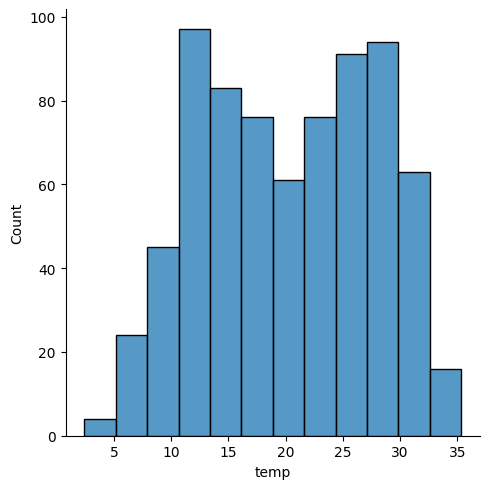

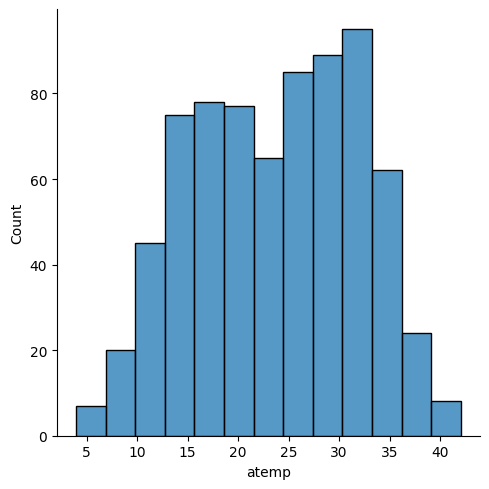

In [23]:
#temperature
sns.displot(dataset['temp'])

#Actual Temperature
sns.displot(dataset['atemp'])
plt.show()

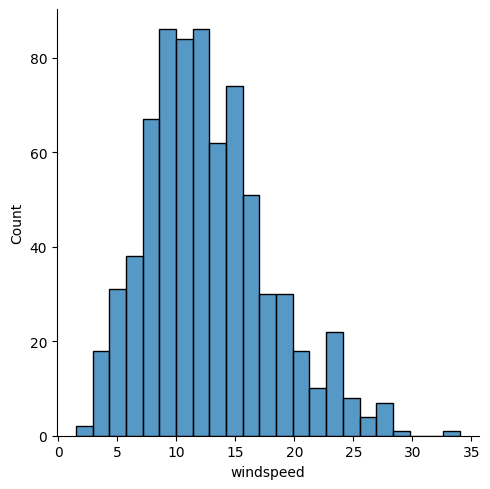

In [24]:
# Windspeed 
sns.displot(dataset['windspeed'])
plt.show()

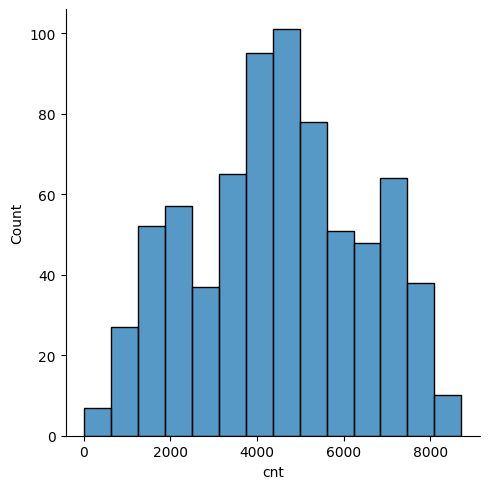

In [25]:
#Target variable : count of total bike rentals including casual and registered
sns.displot(dataset['cnt'])
plt.show()

In [26]:
# Converting date to datetime format
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

dataset_categorical = dataset.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [27]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sun,mist_cloudy
1,spring,Jan,Mon,mist_cloudy
2,spring,Jan,Tue,clear
3,spring,Jan,Wed,clear
4,spring,Jan,Thu,clear
...,...,...,...,...
725,spring,Dec,Fri,mist_cloudy
726,spring,Dec,Sat,mist_cloudy
727,spring,Dec,Sun,mist_cloudy
728,spring,Dec,Mon,clear


C:\Users\hp\AppData\Local\Temp\ipykernel_9344\2411180829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=dataset, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_9344\2411180829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mnth', y='cnt', data=dataset, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_9344\2411180829.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='cnt', data=dataset, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_9344\2411180829.py:9: Futur

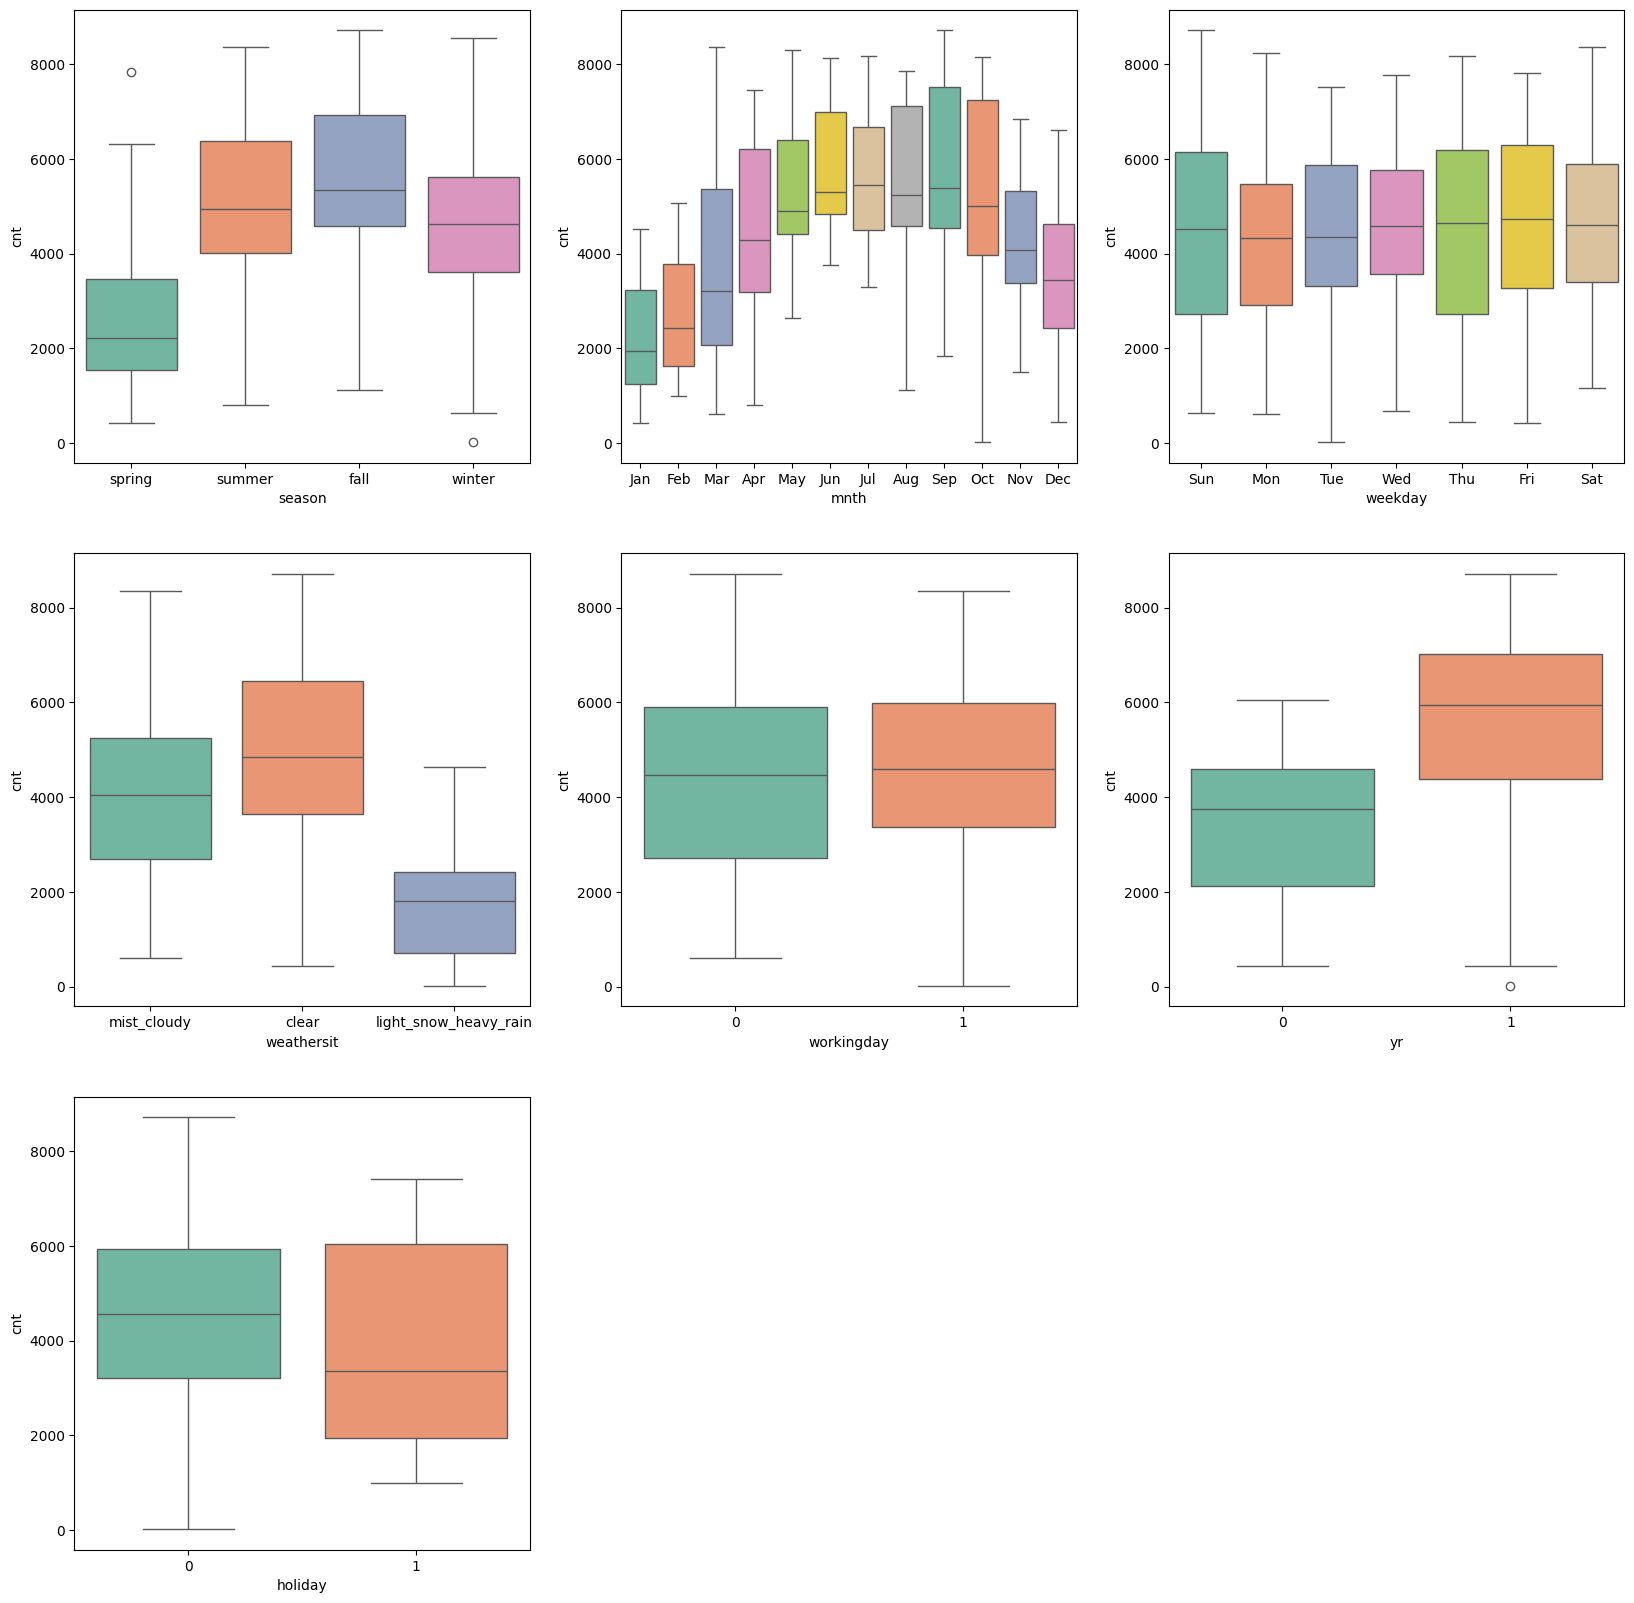

In [28]:
plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=dataset, palette='Set2')
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=dataset, palette='Set2')
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=dataset, palette='Set2')
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=dataset, palette='Set2')
plt.subplot(3, 3, 5)
sns.boxplot(x='workingday', y='cnt', data=dataset, palette='Set2')
plt.subplot(3, 3, 6)
sns.boxplot(x='yr', y='cnt', data=dataset, palette='Set2')
plt.subplot(3, 3, 7)
sns.boxplot(x='holiday', y='cnt', data=dataset, palette='Set2')
plt.show()

In [29]:
intVarlist = ['casual', 'registered', 'cnt']
for var in intVarlist:
    dataset[var] = dataset[var].astype('float64')

dataset_numeric = dataset.select_dtypes(include=['float64'])

In [30]:
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


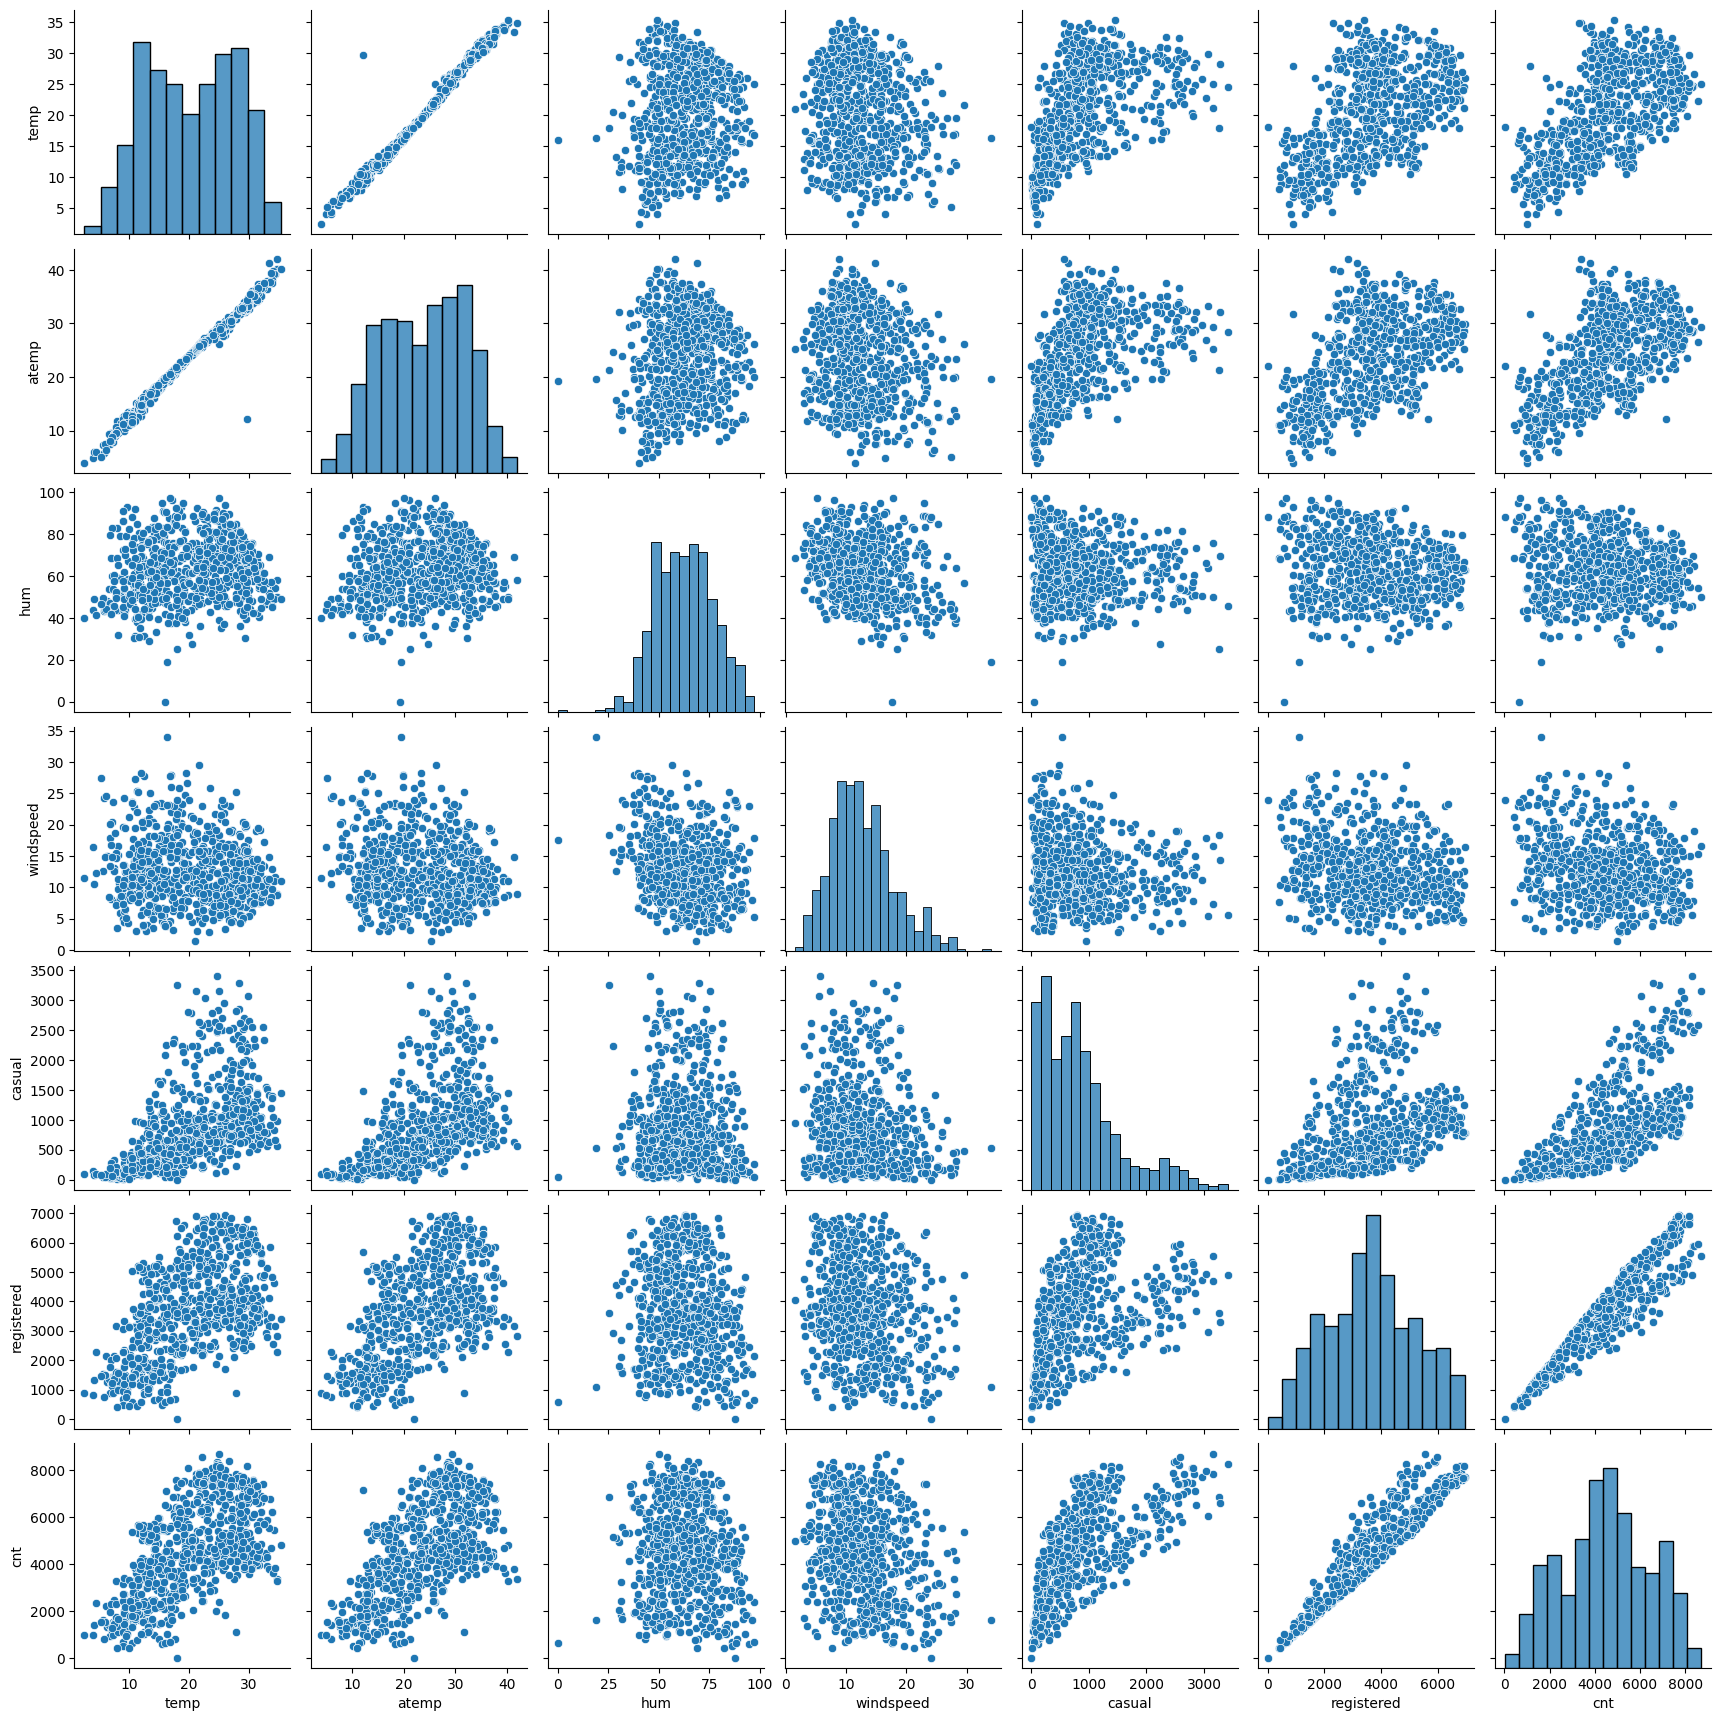

In [31]:
sns.pairplot(dataset_numeric)
plt.show()

3.> DATA PREPARATION

In [32]:
# Drop unnecessary columns
dataset.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# One-hot encoding for categorical features
dataset = pd.get_dummies(dataset, drop_first=True)

# Split data into features and target
X = dataset.drop(['cnt'], axis=1)
y = dataset['cnt']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


4.> MODEL BUILDING

In [33]:
# Liner Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


In [34]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Note: RF doesn't need scaling
y_pred_rf = rf_model.predict(X_test)


In [35]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

print("✅ Best Parameters:")
print(grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
# Cross-validation

from sklearn.model_selection import cross_val_score

# Cross-validation on best model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')

print("🔁 Cross-Validation R² Scores:", cv_scores)
print("📊 Mean CV R² Score:", round(np.mean(cv_scores), 4))


🔁 Cross-Validation R² Scores: [0.87030373 0.84532575 0.86387048 0.8379855  0.89272252]
📊 Mean CV R² Score: 0.862


5.> MODEL EVALUATION

In [37]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n{model_name} Evaluation:")
    print("R² Score:", round(r2_score(y_true, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 4))
    print("RMSLE:", round(np.sqrt(mean_squared_log_error(y_true, y_pred)), 4))


In [38]:
# evaluate Linear Regression 
evaluate_model(y_test, y_pred_lr, "Linear Regression")



Linear Regression Evaluation:
R² Score: 0.8622
RMSE: 686.7315
RMSLE: 0.2249


In [39]:
# Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")




Random Forest Regressor Evaluation:
R² Score: 0.9035
RMSE: 574.7882
RMSLE: 0.1619


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


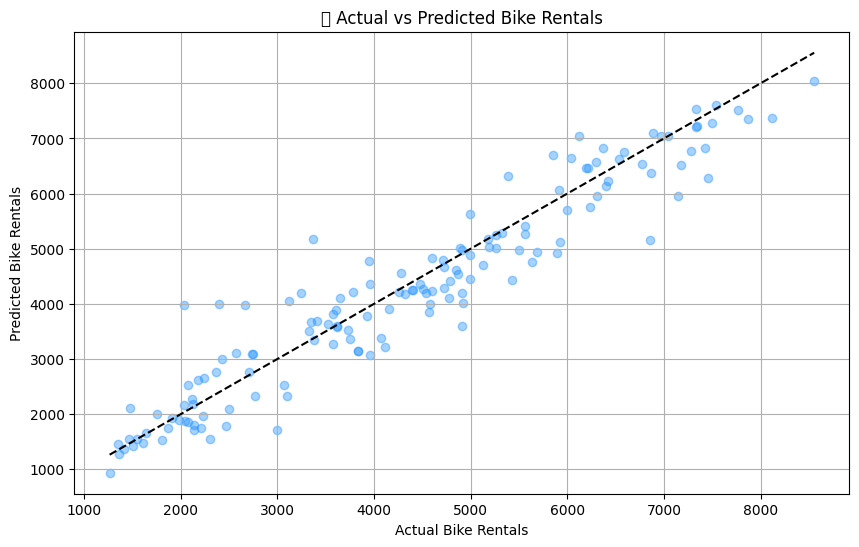

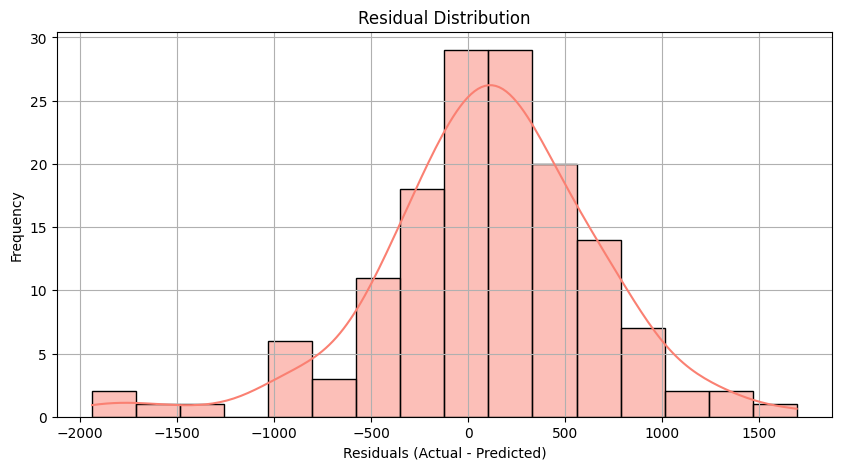

In [40]:
# Predictions on test set
y_pred = best_rf_model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Predicted Bike Rentals')
plt.title('📈 Actual vs Predicted Bike Rentals')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='salmon')
plt.title("Residual Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [41]:
import joblib

# Save the best model and scaler
joblib.dump(best_rf_model, "best_random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("💾 Model and Scaler saved successfully.")


💾 Model and Scaler saved successfully.


In [42]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
import numpy as np

def evaluate_model_summary(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))

    print(f"📊 {model_name} Evaluation Summary:")
    print(f"R² Score  : {r2:.4f}")
    print(f"RMSE      : {rmse:.4f}")
    print(f"RMSLE     : {rmsle:.4f}")

# Example: Evaluate best Random Forest model
evaluate_model_summary(y_test, y_pred, model_name="Random Forest (Tuned)")


📊 Random Forest (Tuned) Evaluation Summary:
R² Score  : 0.9042
RMSE      : 572.6050
RMSLE     : 0.1612
